In [2]:
import numpy as np
import matplotlib.pyplot as plt

from board import Board, Pos, CompleteMove, BOARD_SIZE, make_cm, make_move, make

In [3]:
def draw_board(board: Board, print_info: bool = True):
    from string import ascii_lowercase
    if print_info:
        board.info()
        print(board.get_nbs())
    board_np = np.zeros((BOARD_SIZE, BOARD_SIZE, 3), dtype=int)
    for i in range(BOARD_SIZE):
        for j in range(BOARD_SIZE):
            if board[i, j].is_empty():
                board_np[i, j, :] = np.array([255, 255, 255], dtype=int)
            elif board[i, j].is_player():
                board_np[i, j, :] = np.array([255, 0, 0], dtype=int) if board[i, j].player_id == 0 else np.array([0, 0, 255], dtype=int)
            elif board[i, j].is_trace():
                board_np[i, j, :] = np.array([180, 60, 60], dtype=int) if board[i, j].player_id == 0 else np.array([60, 100, 180], dtype=int)
            elif board[i, j].is_shot():
                board_np[i, j, :] = np.array([120, 120, 120], dtype=int)
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(1, 1, 1)
    _ticks = np.linspace(0.5, BOARD_SIZE-0.5, BOARD_SIZE)
    plt.imshow(board_np)
    plt.plot([1.5, 9.5, 9.5, 1.5, 1.5], [1.5, 1.5, 9.5, 9.5, 1.5], '-ok')
    plt.plot([4], [3], 'or')
    plt.plot([7], [8], 'ob')
    ax.set_yticks(_ticks)
    ax.set_xticks(_ticks)
    ax.tick_params(
        axis='both',
        which='both',
        labelbottom=False,
        labelleft=False)
    ax.grid(which='both')
    for i in range(BOARD_SIZE):
        ax.text(i, BOARD_SIZE+0.5, ascii_lowercase[i], style='italic')
    for i in range(BOARD_SIZE):
        ax.text(-1, BOARD_SIZE - i - 1, (str(i) if i < 10 else ascii_lowercase[i-10]), style='italic')
    plt.show()

def eval_graph(board: Board):
    if not board.eval_history:
        print('no recorded history found')
        return
    plt.plot(board.eval_history, '--o', ms=5)
    plt.grid()
    plt.show()

In [ ]:
b = Board()

In [ ]:
b.set_state_from_ngd('f7/g5 i3/h5, g6/h4 j4/h6, f5/g7 j3/i5, f4/g2 i2/g3, f3/h2 j1/k3, f2/g4 k1/i0, e3/d1 k2/i1, e4/d2 l3/k5, e5/d3 k4/l2, f6/d5 j5/l6, e7/c6 i6/k7, f8/h7 j7/i9, g8/i7 i8/g9, f9/h8 j9/hb, ga/e9 ja/h9, fb/ha k9/ia, ea/gb k8/la, d9/fa l8/ka, c9/bb l7/j6, ca/eb k6/j8, b9/cb r.')

In [ ]:
b.execute_complete_move(make('e7/f5'))
# b.execute_complete_move(make('h4/g6'))
# b.execute_complete_move(make('e6/g5'))
# b.execute_complete_move(make('g3/e4'))
# b.execute_complete_move(make('d5/f4'))
# b.execute_complete_move(make('g4/e5'))
# b.execute_complete_move(make('d4/f3'))
# b.execute_complete_move(make('h5/f6'))

In [ ]:
draw_board(b)

In [ ]:
eval_graph(b)

# Playing against the algo

## PickBest

In [1]:
from engine import PickBest

In [ ]:
board = Board()
algo = PickBest(player_id=1, board=board)

In [ ]:
# my move
board.execute_complete_move(make('b9/cb'))

In [ ]:
# bot's move
algo.make_move()

In [ ]:
draw_board(board)

### Bot vs. Bot

In [36]:
board = Board()
algo_red = PickBest(player_id=0, board=board, randomize=True)
algo_blue = PickBest(player_id=1, board=board, randomize=True)

In [43]:
algo_red.make_move()

equiv moves len 4


b8/a6

In [44]:
algo_blue.make_move()

equiv moves len 4


k3/j1

moves played: 6
player #0 moves: 43
dscr: d8/c6 i3/j5, c8/ea j3/i1, b8/a6 k3/j1, 
eval: 0.00
12/4x7/12/1PTTT7/12/x1x9/9x2/12/7tttp1/12/8xx2/12 r -


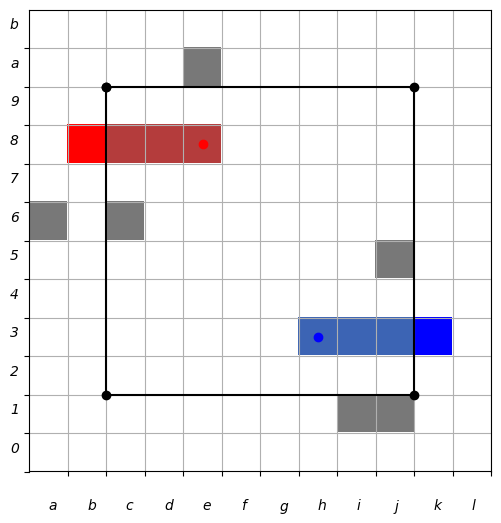

In [45]:
draw_board(board)

## Minimax

In [4]:
from engine import Minimax

In [40]:
board = Board()
algo = Minimax(player_id=1, board=board, depth=3, randomize=True)

In [6]:
board.set_state_from_ngd('e7/f5 h4/g6, f7/g5')

3

In [41]:
board.set_state_from_ngd('e7/f5 h4/g6, f7/g5 i5/k6, g8/h6 j5/k3, h9/i7 j4/i2, g9/ib i3/h1, h8/j7 j2/i4, g7/i8 i1/j3, f6/g4 j1/l0, e5/c6 k2/j0, d6/c4 k1/i0, d7/b6')

21

In [86]:
# my move
board.execute_complete_move(make('b7/a9'))

In [87]:
# bot's move
algo.make_move()
# algo.pick_move()

IndexError: list index out of range

moves played: 43
player #1 moves: 0
dscr: e7/f5 h4/g6, f7/g5 i5/k6, g8/h6 j5/k3, h9/i7 j4/i2, g9/ib i3/h1, h8/j7 j2/i4, g7/i8 i1/j3, f6/g4 j1/l0, e5/c6 k2/j0, d6/c4 k1/i0, d7/b6 l2/k0, d8/e6 l3/k5, d9/b8 k4/j6, e9/cb l5/k7, ea/f8 l6/k8, fb/ha l7/k9, eb/ga l8/ka, da/f9 l9/ja, c9/db la/j9, c8/ba kb/ia, c7/b9 jb/i9, b7/a9 r.
eval: 1.00
2xxTT2xpt1/1x1TT1xxxxxt/xxTTTxTTxxxt/1xTTTxTTx1xt/1PTTTTT1xxxt/1xxTxTxx1xxt/4Txx1ttxt/2x3xtxtt1/7ttxxt/8xttt/7xttt1/8xxxx b R


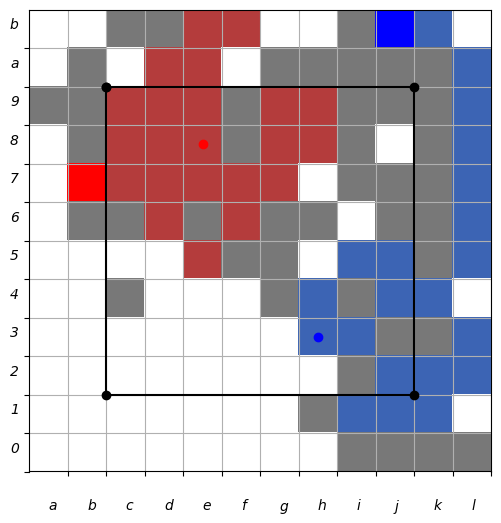

In [88]:
draw_board(board)

# Reviewing a game

In [ ]:
from board import GameReplay

In [ ]:
gr = GameReplay(
    ngd='f7/g5 i3/h5, g6/h4 j4/h6, f5/g7 j3/i5, f4/g2 i2/g3, f3/h2 j1/k3, f2/g4 k1/i0, e3/d1 k2/i1, e4/d2 l3/k5, e5/d3 k4/l2, f6/d5 j5/l6, e7/c6 i6/k7, f8/h7 j7/i9, g8/i7 i8/g9, f9/h8 j9/hb, ga/e9 ja/h9, fb/ha k9/ia, ea/gb k8/la, d9/fa l8/ka, c9/bb l7/j6, ca/eb k6/j8, b9/cb r.'
)

In [ ]:
gr.play()
draw_board(gr.b)